In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
data = pd.read_csv('winequality-white.csv', sep=";")

X = data[data.columns[:-1]].values
y = data['quality'].values

In [5]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3 ) # 30% des données dans le jeu de test

In [6]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [7]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=11)

knn.fit(X_train_std, y_train)

KNeighborsRegressor(n_neighbors=11)

In [8]:
y_pred = knn.predict(X_test_std)

In [10]:
from sklearn import metrics

print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )))

RMSE : 0.69


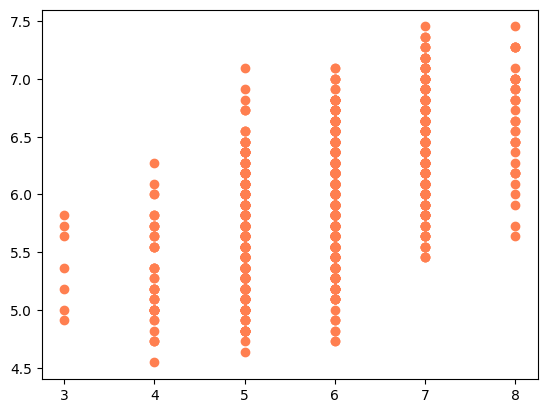

In [13]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred, color='coral')

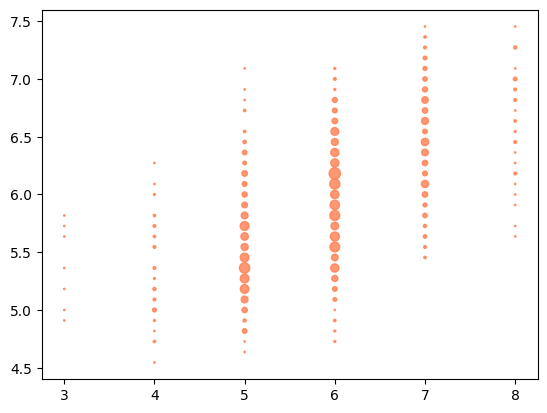

In [14]:
sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.scatter(
        [k[0] for k in keys], # vraie valeur (abscisse)
        [k[1] for k in keys], # valeur predite (ordonnee)
        s=[sizes[k] for k in keys], # taille du marqueur
        color='coral', alpha =0.8)


In [28]:
y_pred_random = np.random.randint(np.min(y_train), np.max(y_train), y_test.shape)

In [38]:
print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred_random) )))

RMSE : 1.95


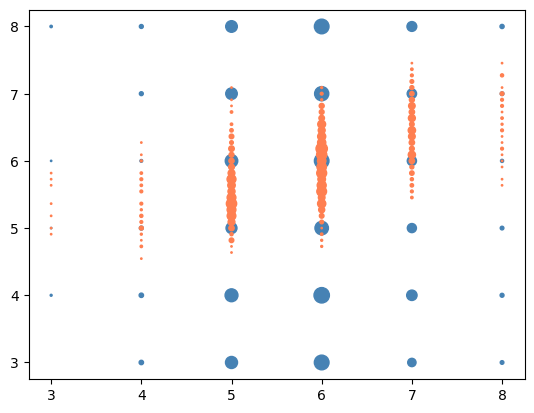

In [31]:
sizes_random = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_pred_random)):
    if (yt, yp) in sizes_random:
        sizes_random[(yt, yp)] += 1
    else:
        sizes_random[(yt, yp)] = 1

keys = sizes_random.keys()
plt.scatter(
        [k[0] for k in keys], # vraie valeur (abscisse)
        [k[1] for k in keys], # valeur predite (ordonnee)
        s=[sizes_random[k] for k in keys], # taille du marqueur
        color='steelblue')

keys = sizes.keys()
plt.scatter(
        [k[0] for k in keys], # vraie valeur (abscisse)
        [k[1] for k in keys], # valeur predite (ordonnee)
        s=[sizes[k] for k in keys], # taille du marqueur
        color='coral')
 

In [32]:
from sklearn import dummy
dum = dummy.DummyRegressor(strategy='mean')

In [33]:
dum.fit(X_train_std, y_train)

DummyRegressor()

In [37]:
y_pred_dum = dum.predict(X_test_std)
print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred_dum) )))

RMSE : 0.87
